# Natural Language Processing - Text Summarization example

###### Links: [News Summary Dataset (Kaggle)](https://www.kaggle.com/pariza/bbc-news-summary)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [30]:
# Read files txt
import os

folder = "data_summary/full_articles/"
full_articles = []
for file in os.listdir(folder):
    txt = open(folder+file, "r")
    full_articles.append(' '.join([i.strip() for i in txt.readlines()]))
    
print("len:", len(full_articles))

len: 510


In [31]:
folder = "data_summary/summaries/"
summaries = []
for file in os.listdir(folder):
    txt = open(folder+file, "r")
    summaries.append(' '.join([i.strip() for i in txt.readlines()]))

print("len:", len(summaries))

len: 510


In [26]:
# Create dataframe
dtf = pd.DataFrame({"text":full_articles, "y":summaries})
dtf.head()

,text,y
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...


In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    510 non-null    object
 1   y       510 non-null    object
dtypes: object(2)
memory usage: 8.1+ KB


In [29]:
# check
i = 5
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Japan narrowly escapes recession  Japan's economy teetered on the brink of a technical recession in the three months to September, figures show.  Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth.  The government was keen to play down the worrying implications of the data. "I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully," said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. "It's painting a picture of a recovery... much patchier than previously thought,"

### 1 - Text Analysis

- Text cleaning
- Length analysis
- Word frequency

###### Text cleaning

In [6]:
#dtf = add_preprocessed_text(dtf, "text", lst_regex=None, lst_stopwords=[], flg_stemm=False, flg_lemm=False)
#dtf.head()

In [7]:
dtf["text_clean"] = dtf["text"].str.lower()
dtf.head()

,text,y,text_clean
0,Ad sales boost Time Warner profit Quarterly p...,TimeWarner said fourth quarter sales rose 2% t...,ad sales boost time warner profit quarterly p...
1,Dollar gains on Greenspan speech The dollar h...,The dollar has hit its highest level against t...,dollar gains on greenspan speech the dollar h...
2,Yukos unit buyer faces loan claim The owners ...,Yukos' owner Menatep Group says it will ask Ro...,yukos unit buyer faces loan claim the owners ...
3,High fuel prices hit BA's profits British Air...,"Rod Eddington, BA's chief executive, said the ...",high fuel prices hit ba's profits british air...
4,Pernod takeover talk lifts Domecq Shares in U...,Pernod has reduced the debt it took on to fund...,pernod takeover talk lifts domecq shares in u...


###### Word frequency

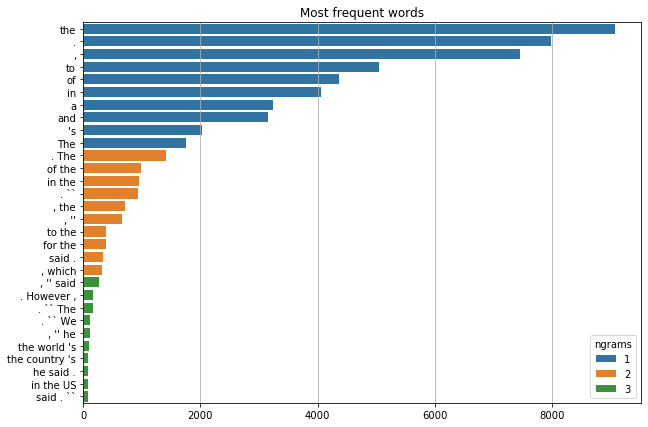

In [8]:
words = word_freq(corpus=dtf["text"], ngrams=[1,2,3], top=10, figsize=(10,7))

###### Length analysis

In [9]:
dtf = add_text_length(dtf, "text_clean")

                            min         mean          max
word_count           142.000000   333.141176   902.000000
char_count           698.000000  1654.464706  4508.000000
sentence_count         6.000000    15.174510    47.000000
avg_word_length        4.353211     4.971854     5.654167
avg_sentence_lenght   15.600000    21.961360    33.714286


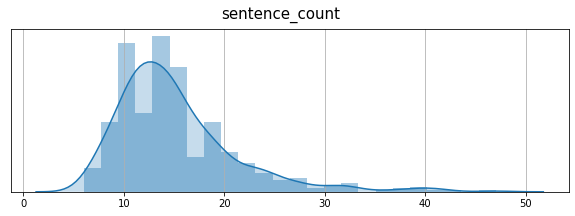

In [10]:
plot_distributions(dtf, x="sentence_count", figsize=(10,3))

In [11]:
dtf = add_text_length(dtf, "y")

                           min        mean          max
word_count            40.00000  139.949020   403.000000
char_count           204.00000  727.425490  2076.000000
sentence_count         1.00000    1.029412     3.000000
avg_word_length        4.21875    5.215020     6.107143
avg_sentence_lenght   26.00000  137.484967   403.000000


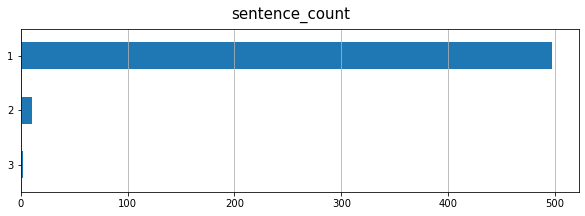

In [12]:
plot_distributions(dtf, x="sentence_count", figsize=(10,3))

###### Summary

In [13]:
dtf = dtf[["text","text_clean","y"]]
dtf.head()

,text,text_clean,y
0,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits British Air...,high fuel prices hit ba's profits british air...,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,Pernod has reduced the debt it took on to fund...


### 2 - Preprocessing

### 3 - Baseline (Extractive: TextRank)

In [53]:
# Train/Test
predicted = textrank(corpus=dtf["text"], ratio=0.2)

In [56]:
# Evaluate
evaluate_summary(list(dtf["y"].values), predicted)

rouge: 0.47


In [ ]:
# Explainability
i = 5


### 4 - Model (Abstractive: Deep Learning)

In [74]:
predicted

['a common technical definition of a recession is two successive quarters of negative growth . the government was keen to play down the worrying implications of the data . improvements in the job market apparently have yet to feed through to domestic demand .']

### 5 - Model (Abstractive: Language model)

In [78]:
# Train/Test (this takes a while)
predicted = bart(corpus=[dtf["text_clean"][5]], ratio=0.2)

KeyError: 'text_clean'

In [79]:
# Evaluate
evaluate_summary([list(dtf["y"].values)[5]], predicted)

rouge: 0.37


In [ ]:
# Explainability
i = 5